In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the desired mount path
mount_path = '/content/drive/My Drive/ANPR'


Mounted at /content/drive


In [8]:
%cd '/content/drive/MyDrive/ANPR/ANPR'

/content/drive/MyDrive/ANPR/ANPR


In [4]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [9]:
#load model
model =tf.keras.models.load_model('./models/object_detection.h5')
print("model loaded succesfully")

model loaded succesfully


In [13]:
path='./test_images/N207.jpeg'
image=load_img(path) #PIL object
image=np.array(image,dtype=np.uint8)

image1=load_img(path,target_size=(224,224))
image_arr_224=img_to_array(image1)/255.0
#convert into array and get the normalized output

In [14]:
#print size of original image
h,w,d=image.shape
print("height of the image =",h)
print("width of image =",w)

height of the image = 423
width of image = 541


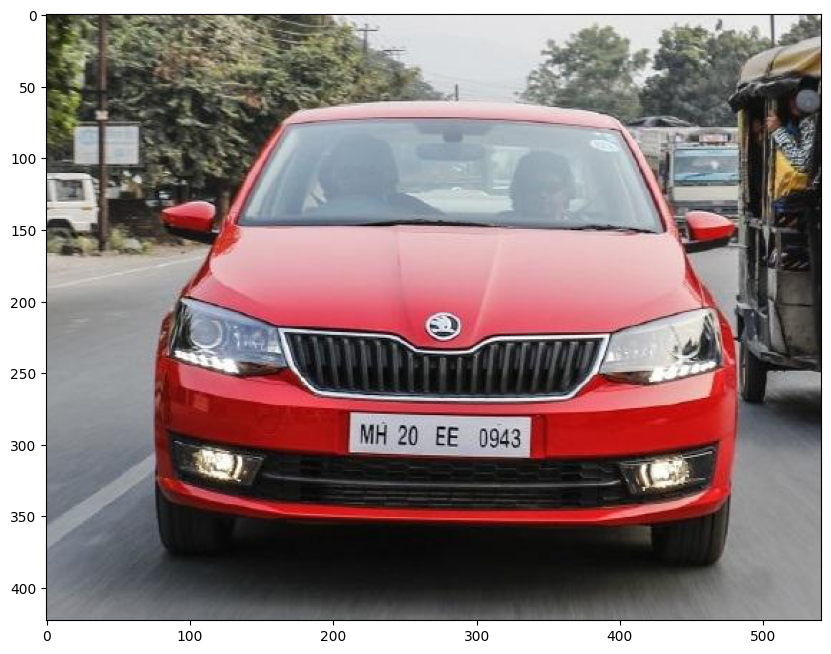

In [15]:
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [16]:
image_arr_224.shape

(224, 224, 3)

In [17]:
test_arr=image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [18]:
#make prediction
coords=model.predict(test_arr)
coords


1/1 [==============================] - 10s 10s/step


array([[0.38639733, 0.6081223 , 0.65801775, 0.7285676 ]], dtype=float32)

In [19]:
#denormalize the values
denorm=np.array([w,w,h,h])
coords=coords*denorm
coords

array([[209.04095659, 328.99415845, 278.34151018, 308.18409491]])

In [20]:
coords=coords.astype(np.int32)
coords

array([[209, 328, 278, 308]], dtype=int32)

(209, 278) (328, 308)


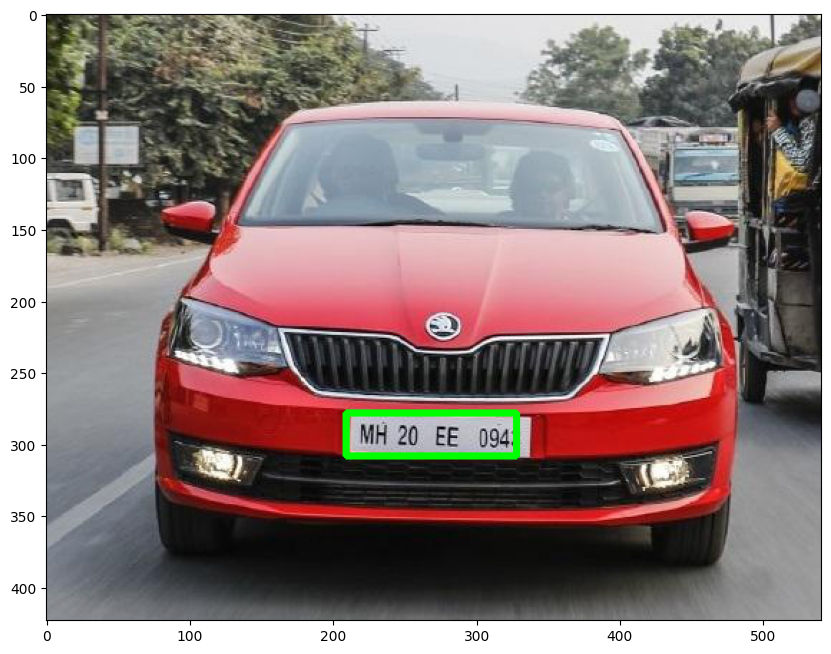

In [21]:
#draw bounding on top of the image
xmin,xmax,ymin,ymax=coords[0]
pt1=(xmin,ymin)
pt2=(xmax,ymax)
print(pt1,pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [22]:
#create pipeline
path='./test_images/N207.jpeg'
def object_detection(path):
    #read image
    image=load_img(path) #PIL object
    image=np.array(image,dtype=np.uint8)

    image1=load_img(path,target_size=(224,224))
    image_arr_224=img_to_array(image1)/255.0
    #data preprocessing
    h,w,d=image.shape
    test_arr=image_arr_224.reshape(1,224,224,3)
    #make prediction
    coords=model.predict(test_arr)

    #denormalize the values
    denorm=np.array([w,w,h,h])
    coords=coords*denorm

    coords=coords.astype(np.int32)

    #draw bounding on top of the image
    xmin,xmax,ymin,ymax=coords[0]
    pt1=(xmin,ymin)
    pt2=(xmax,ymax)
    print(pt1,pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)

    return image,coords


1/1 [==============================] - 0s 328ms/step
(1289, 981) (2416, 1301)


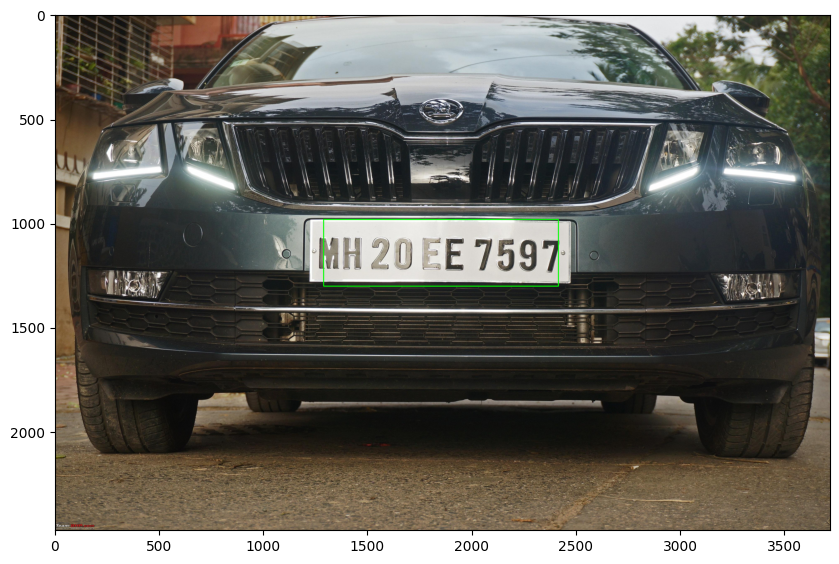

In [23]:
path='./test_images/N59.jpeg'
image,cods=object_detection(path)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()


In [10]:
#optical character recognition
!pip install pytesseract
!pip install tesseract-ocr


  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tesseract-ocr
  Running setup.py clean for tesseract-ocr
Failed to build tesseract-ocr
ERROR: Could not build wheels for tesseract-ocr, which is required to install pyproject.toml-based projects


In [ ]:

import pytesseract as pt

# Specify the Tesseract executable path
pt.pytesseract.tesseract_cmd = r'/path/to/tesseract'

# Continue with the rest of your code



1/1 [==============================] - 1s 502ms/step
(1289, 981) (2416, 1301)


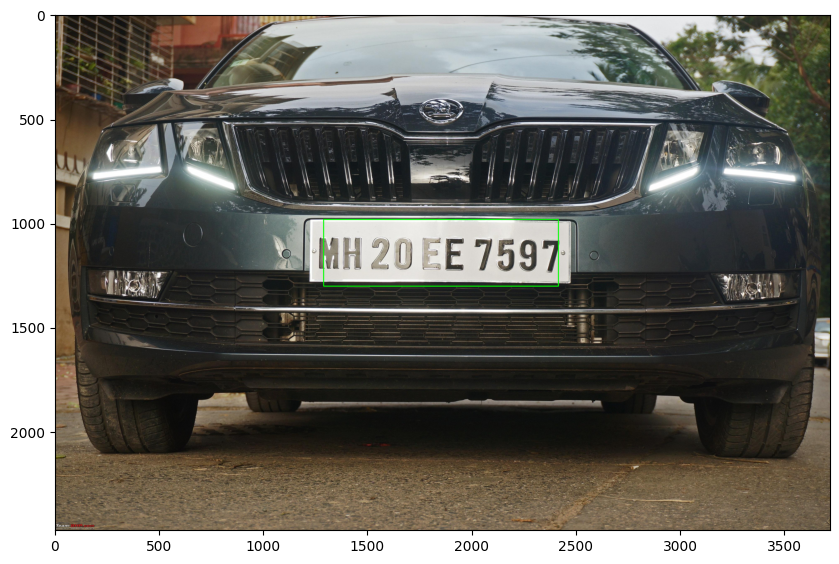

In [24]:
path='./test_images/N59.jpeg'
image,cods=object_detection(path)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()


In [25]:
xmin,xmax,ymin,ymax=cods[0]

In [26]:
img=np.array(load_img(path))
xmin,xmax,ymin,ymax=cods[0]
roi=img[ymin:ymax,xmin:xmax]

array([[[177, 187, 214],
        [176, 186, 213],
        [176, 186, 213],
        ...,
        [ 37,  47,  38],
        [ 37,  47,  38],
        [ 37,  47,  38]],

       [[242, 253, 255],
        [242, 253, 255],
        [243, 254, 255],
        ...,
        [ 37,  46,  41],
        [ 37,  46,  41],
        [ 38,  47,  42]],

       [[244, 254, 245],
        [246, 255, 247],
        [246, 255, 247],
        ...,
        [ 32,  41,  40],
        [ 34,  43,  42],
        [ 35,  44,  43]],

       ...,

       [[ 28,  30,  27],
        [ 28,  30,  27],
        [ 28,  30,  27],
        ...,
        [ 22,  26,  25],
        [ 24,  28,  27],
        [ 27,  31,  30]],

       [[ 27,  29,  28],
        [ 27,  29,  28],
        [ 27,  29,  28],
        ...,
        [ 20,  24,  23],
        [ 22,  26,  25],
        [ 24,  28,  27]],

       [[ 27,  29,  28],
        [ 27,  29,  28],
        [ 27,  29,  28],
        ...,
        [ 24,  28,  27],
        [ 26,  30,  29],
        [ 27,  31,  30]]

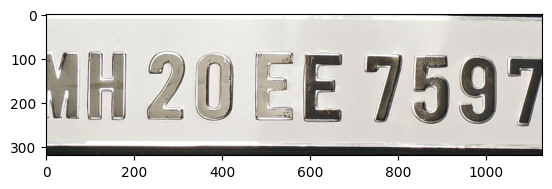

In [27]:
plt.imshow(roi)
roi

In [ ]:
import pytesseract as pt


1/1 [==============================] - 0s 307ms/step
(1289, 981) (2416, 1301)


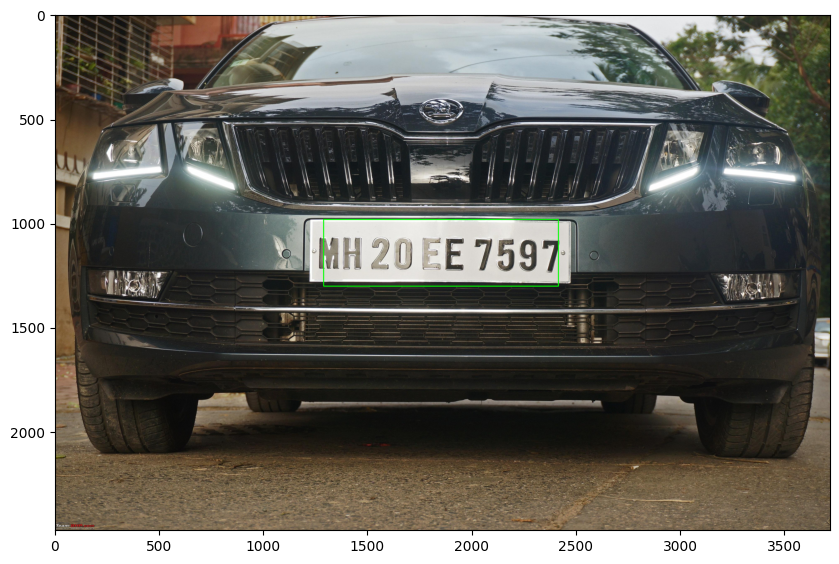

In [28]:
path='./test_images/N59.jpeg'
image,cods=object_detection(path)
plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()


In [29]:
img=np.array(load_img(path))
img

array([[[ 75,  46,  32],
        [ 74,  45,  29],
        [ 73,  44,  28],
        ...,
        [ 54,  52,  31],
        [ 58,  56,  35],
        [ 60,  58,  37]],

       [[ 77,  48,  34],
        [ 76,  47,  31],
        [ 75,  46,  30],
        ...,
        [ 56,  54,  33],
        [ 59,  57,  36],
        [ 60,  58,  37]],

       [[ 77,  49,  35],
        [ 77,  50,  33],
        [ 76,  49,  32],
        ...,
        [ 59,  57,  36],
        [ 59,  57,  36],
        [ 60,  58,  37]],

       ...,

       [[109,  90,  76],
        [ 94,  76,  62],
        [ 90,  72,  58],
        ...,
        [106,  94,  70],
        [106,  91,  68],
        [104,  89,  66]],

       [[106,  88,  76],
        [101,  83,  71],
        [ 97,  81,  68],
        ...,
        [ 97,  85,  61],
        [100,  85,  62],
        [101,  86,  63]],

       [[101,  83,  73],
        [108,  90,  80],
        [106,  89,  79],
        ...,
        [ 89,  77,  53],
        [ 95,  80,  57],
        [ 98,  83,  60]]

In [30]:
xmin,xmax,ymin,ymax=cods[0]
roi=img[ymin:ymax,xmin:xmax]

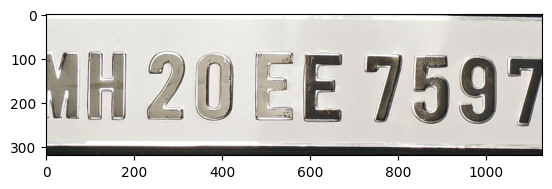

In [31]:
plt.imshow(roi)
plt.show()

In [11]:
!pip install easyocr
import easyocr

In [32]:
reader=easyocr.Reader(['en'])
output=reader.readtext(roi)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [33]:
output

[([[0, 66], [1127, 66], [1127, 260], [0, 260]],
  'MH 20 EE 7597',
  0.6115972883088902)]

In [ ]:
#extract text from image
pt.image_to_string(roi)

TesseractNotFoundError: /usr/bin/tesseract is not installed or it's not in your PATH. See README file for more information.